# Goal

- 이 모델의 목적?
    - 대구 지역의 사고 다발 지점 선별 (https://news.kbs.co.kr/news/pc/view/view.do?ncd=7748676)
    - 사고율 낮춤

데이터로부터 사고위험도(ECLO)를 예측하는 AI 알고리즘 발굴

ECLO(Equivalent Casualty Loss Only) : 인명피해 심각도

ECLO = 사망자수 * 10 + 중상자수 * 5 + 경상자수 * 3 + 부상자수 * 1

# Why

- 이 데이터를 왜 사용하는지?
    - 해당 데이터로 예측할 수 있는 라벨이 명확
- 결측치
    - 적음
- 데이터셋 사용
    - table join 하지 않고 사용 가능한 데이터

# How

- 어떤 feature 사용할지?
    - '사고일시', '요일', '기상상태', '시군구', '도로형태', '노면상태', '사고유형' 사용
    - **인명피해 심각도** 예측
- 회귀 분석
- RMSLE

# Data Description

### Dataset Info.
- train.csv
    - ID : 대구에서 발생한 교통사고의 고유 ID -2019년부터 2021년까지의 교통사고 데이터로 구성
    - 해당 사고가 발생한 당시의 시공간 정보와 사고 관련 정보 포함
    - ECLO : 인명피해 심각도  
    <br>
- test.csv
    - ID : 대구에서 발생한 교통사고의 고유 ID
    - 2022년도의 교통사고 데이터로 구성
    - 추론 시점에서 획득할 수 있는 정보로 구성
    <br>
    <br>
- sample_submission.csv - 제출 양식
    - ID : 추론 샘플의 고유 ID
    - ECLO : 예측한 인명피해 심각도


### External data
- 대구 빅데이터활용센터에서 구축한 빅데이터 마트 데이터 중 제공 가능한 일부 데이터셋
- 상세한 명세는 폴더 내부의 빅데이터 마트 데이터 설명서.hwp 참고
- 전체 빅데이터 마트 데이터셋을 활용하기 위해서는 대구 빅데이터활용센터 방문 필요

- 대구를 제외한 전국에서 발생한 교통사고 데이터
- 2019년부터 2021년까지의 교통사고 데이터로 구성
- 대구에 존재하는 보안등 관련 정보
- 대구에 존재하는 어린이 보호 구역 관련 정보
- 대구에 존재하는 주차장 관련 정보
- 대구에 존재하는 CCTV 관련 정보

# EDA

# 간단 EDA

In [1]:
import pandas as pd 

train_org = pd.read_csv('/home/estsoft/data/train.csv') 
test_org = pd.read_csv('/home/estsoft/data/test.csv')

display(train_org.head(5))

,ID,사고일시,요일,기상상태,시군구,도로형태,노면상태,사고유형,사고유형 - 세부분류,법규위반,...,가해운전자 상해정도,피해운전자 차종,피해운전자 성별,피해운전자 연령,피해운전자 상해정도,사망자수,중상자수,경상자수,부상자수,ECLO
0,ACCIDENT_00000,2019-01-01 00,화요일,맑음,대구광역시 중구 대신동,단일로 - 기타,건조,차대사람,길가장자리구역통행중,안전운전불이행,...,상해없음,보행자,여,70세,중상,0,1,0,0,5
1,ACCIDENT_00001,2019-01-01 00,화요일,흐림,대구광역시 달서구 감삼동,단일로 - 기타,건조,차대사람,보도통행중,기타,...,상해없음,보행자,남,61세,경상,0,0,1,0,3
2,ACCIDENT_00002,2019-01-01 01,화요일,맑음,대구광역시 수성구 두산동,단일로 - 기타,건조,차대사람,차도통행중,안전운전불이행,...,상해없음,보행자,남,38세,경상,0,0,1,0,3
3,ACCIDENT_00003,2019-01-01 02,화요일,맑음,대구광역시 북구 복현동,단일로 - 기타,건조,차대차,추돌,안전운전불이행,...,상해없음,승용,남,36세,중상,0,1,0,0,5
4,ACCIDENT_00004,2019-01-01 04,화요일,맑음,대구광역시 동구 신암동,단일로 - 기타,건조,차대차,추돌,안전운전불이행,...,상해없음,승용,남,52세,경상,0,0,1,0,3


In [2]:
test_org.tail(20)

,ID,사고일시,요일,기상상태,시군구,도로형태,노면상태,사고유형
10943,ACCIDENT_50552,2022-12-31 06,토요일,맑음,대구광역시 동구 신암동,교차로 - 교차로안,건조,차대차
10944,ACCIDENT_50553,2022-12-31 07,토요일,맑음,대구광역시 북구 읍내동,단일로 - 기타,건조,차대사람
10945,ACCIDENT_50554,2022-12-31 09,토요일,맑음,대구광역시 동구 신천동,교차로 - 교차로안,건조,차대차
10946,ACCIDENT_50555,2022-12-31 09,토요일,맑음,대구광역시 달서구 호림동,교차로 - 교차로부근,건조,차대차
10947,ACCIDENT_50556,2022-12-31 10,토요일,맑음,대구광역시 수성구 만촌동,단일로 - 기타,건조,차대차
10948,ACCIDENT_50557,2022-12-31 12,토요일,맑음,대구광역시 남구 봉덕동,단일로 - 기타,건조,차대차
10949,ACCIDENT_50558,2022-12-31 12,토요일,맑음,대구광역시 동구 율하동,단일로 - 기타,건조,차대사람
10950,ACCIDENT_50559,2022-12-31 12,토요일,맑음,대구광역시 수성구 매호동,교차로 - 교차로부근,건조,차대차
10951,ACCIDENT_50560,2022-12-31 12,토요일,맑음,대구광역시 중구 포정동,교차로 - 교차로안,건조,차대차
10952,ACCIDENT_50561,2022-12-31 13,토요일,맑음,대구광역시 수성구 범어동,단일로 - 기타,건조,차대차


In [3]:
display(test_org.tail(5))


,ID,사고일시,요일,기상상태,시군구,도로형태,노면상태,사고유형
10958,ACCIDENT_50567,2022-12-31 18,토요일,맑음,대구광역시 남구 대명동,단일로 - 터널,건조,차대차
10959,ACCIDENT_50568,2022-12-31 18,토요일,맑음,대구광역시 수성구 시지동,단일로 - 기타,건조,차대차
10960,ACCIDENT_50569,2022-12-31 20,토요일,맑음,대구광역시 수성구 연호동,단일로 - 기타,건조,차대차
10961,ACCIDENT_50570,2022-12-31 20,토요일,맑음,대구광역시 수성구 범물동,교차로 - 교차로부근,건조,차대차
10962,ACCIDENT_50571,2022-12-31 21,토요일,맑음,대구광역시 동구 효목동,교차로 - 교차로부근,건조,차대차


In [4]:
train_org.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39609 entries, 0 to 39608
Data columns (total 23 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   ID           39609 non-null  object
 1   사고일시         39609 non-null  object
 2   요일           39609 non-null  object
 3   기상상태         39609 non-null  object
 4   시군구          39609 non-null  object
 5   도로형태         39609 non-null  object
 6   노면상태         39609 non-null  object
 7   사고유형         39609 non-null  object
 8   사고유형 - 세부분류  39609 non-null  object
 9   법규위반         39609 non-null  object
 10  가해운전자 차종     39609 non-null  object
 11  가해운전자 성별     39609 non-null  object
 12  가해운전자 연령     39609 non-null  object
 13  가해운전자 상해정도   39609 non-null  object
 14  피해운전자 차종     38618 non-null  object
 15  피해운전자 성별     38618 non-null  object
 16  피해운전자 연령     38618 non-null  object
 17  피해운전자 상해정도   38618 non-null  object
 18  사망자수         39609 non-null  int64 
 19  중상자수         39609 non-nu

In [5]:
test_org.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10963 entries, 0 to 10962
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   ID      10963 non-null  object
 1   사고일시    10963 non-null  object
 2   요일      10963 non-null  object
 3   기상상태    10963 non-null  object
 4   시군구     10963 non-null  object
 5   도로형태    10963 non-null  object
 6   노면상태    10963 non-null  object
 7   사고유형    10963 non-null  object
dtypes: object(8)
memory usage: 685.3+ KB


# 결측치 없는지 확인

In [6]:
train_org.isna().sum()          # 피해 운전자 상세내용 991개

ID               0
사고일시             0
요일               0
기상상태             0
시군구              0
도로형태             0
노면상태             0
사고유형             0
사고유형 - 세부분류      0
법규위반             0
가해운전자 차종         0
가해운전자 성별         0
가해운전자 연령         0
가해운전자 상해정도       0
피해운전자 차종       991
피해운전자 성별       991
피해운전자 연령       991
피해운전자 상해정도     991
사망자수             0
중상자수             0
경상자수             0
부상자수             0
ECLO             0
dtype: int64

In [7]:
test_org.isna().sum()       # 결측치 없음

ID      0
사고일시    0
요일      0
기상상태    0
시군구     0
도로형태    0
노면상태    0
사고유형    0
dtype: int64

# 결측치 분석

결측치의 대부분(991개 중 853개)은 안전운전불이행

In [8]:
unique_values = train_org['법규위반'].unique()
print(unique_values)

['안전운전불이행' '기타' '교차로운행방법위반' '신호위반' '중앙선침범' '안전거리미확보' '차로위반' '보행자보호의무위반'
 '직진우회전진행방해' '과속' '불법유턴']


In [9]:
mask = train_org['피해운전자 차종'].isna()
result = train_org.loc[mask, '법규위반']
result.value_counts()

법규위반
안전운전불이행      853
기타           112
안전거리미확보        9
과속             8
교차로운행방법위반      3
불법유턴           3
중앙선침범          1
직진우회전진행방해      1
신호위반           1
Name: count, dtype: int64

# 데이터 밸런스 확인

In [10]:
train_org.describe(include='all')

,ID,사고일시,요일,기상상태,시군구,도로형태,노면상태,사고유형,사고유형 - 세부분류,법규위반,...,가해운전자 상해정도,피해운전자 차종,피해운전자 성별,피해운전자 연령,피해운전자 상해정도,사망자수,중상자수,경상자수,부상자수,ECLO
count,39609,39609,39609,39609,39609,39609,39609,39609,39609,39609,...,39609,38618,38618,38618,38618,39609.000000,39609.000000,39609.000000,39609.000000,39609.000000
unique,39609,18057,7,6,199,11,6,3,14,11,...,6,13,3,97,6,NaN,NaN,NaN,NaN,NaN
top,ACCIDENT_00000,2019-11-15 18,금요일,맑음,대구광역시 남구 대명동,단일로 - 기타,건조,차대차,측면충돌,안전운전불이행,...,상해없음,승용,남,59세,경상,NaN,NaN,NaN,NaN,NaN
freq,1,13,6179,36181,1749,19485,36420,31785,17104,21876,...,29309,20315,27505,867,25034,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.007776,0.262365,1.070085,0.126865,4.726704
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.090109,0.500845,0.992034,0.394670,3.207206
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000,1.000000
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000,3.000000
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,1.000000,0.000000,3.000000
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,1.000000,0.000000,6.000000


- 불균형 데이터
    - 기상상태: 맑음이 대부분
    - 노면상태: 건조가 대부분
    - 사고유형: 차대차가 대부분

밸런스 맞추는 방법    → Oversampling: SMOTE, ADASYN, Cost-sensitvie learning 사용

/home/estsoft/miniconda3/envs/Popcorn/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/estsoft/miniconda3/envs/Popcorn/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/estsoft/miniconda3/envs/Popcorn/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/estsoft/miniconda3/envs/Popcorn/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be remov

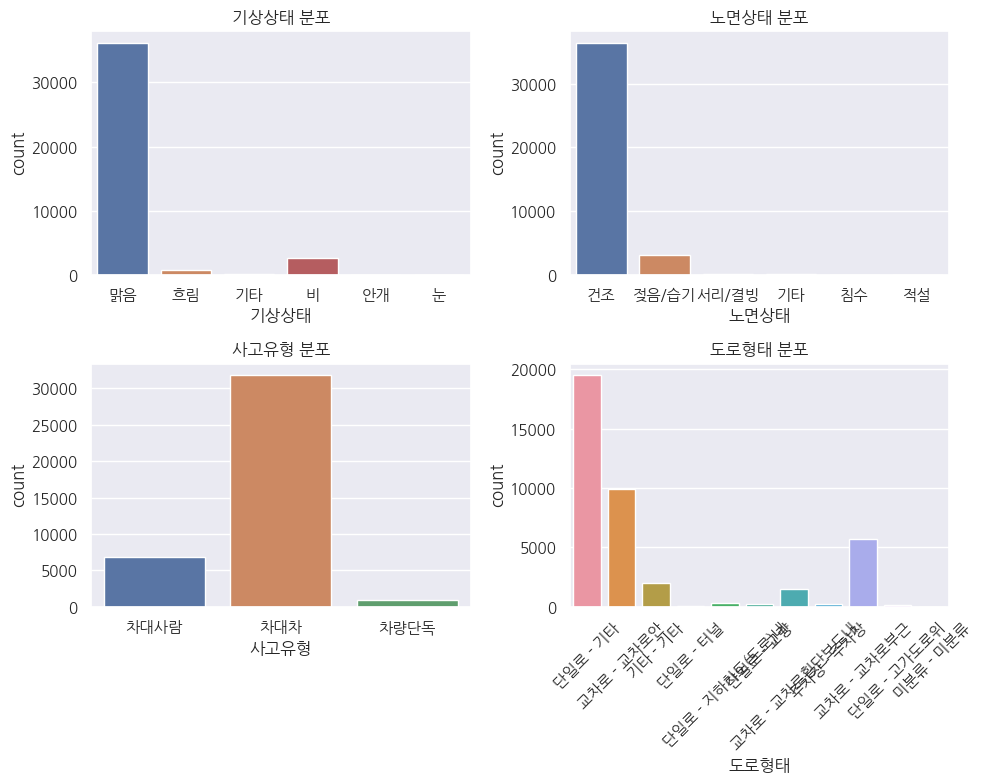

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(rc = {'font.family':'NanumGothic'})

fig, axes = plt.subplots(2, 2, figsize=(10, 8))

sns.countplot(data=train_org, x='기상상태', ax=axes[0, 0])
axes[0, 0].set_title('기상상태 분포')

sns.countplot(data=train_org, x='노면상태', ax=axes[0, 1])
axes[0, 1].set_title('노면상태 분포')

sns.countplot(data=train_org, x='사고유형', ax=axes[1, 0])
axes[1, 0].set_title('사고유형 분포')

sns.countplot(data=train_org, x='도로형태', ax=axes[1, 1])
axes[1, 1].set_title('도로형태 분포')
axes[1, 1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

/home/estsoft/miniconda3/envs/Popcorn/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/estsoft/miniconda3/envs/Popcorn/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/estsoft/miniconda3/envs/Popcorn/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


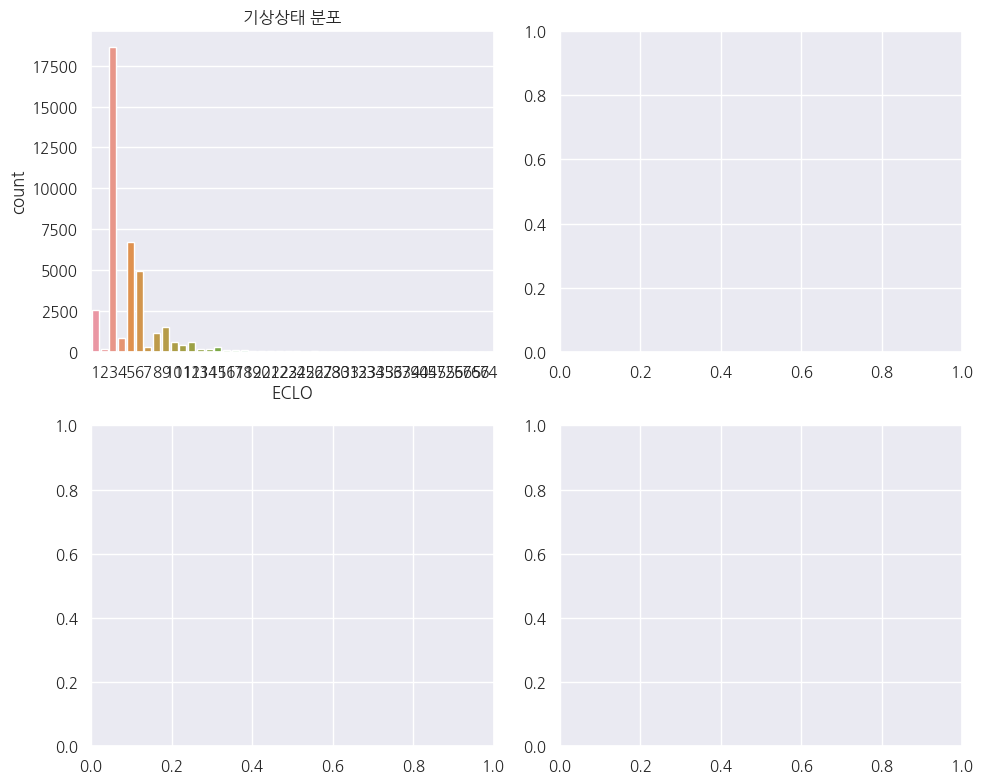

In [20]:
sns.set(rc = {'font.family':'NanumGothic'})
fig, axes = plt.subplots(2, 2, figsize=(10, 8))
sns.countplot(data=train_org, x='ECLO', ax=axes[0, 0])
axes[0, 0].set_title('기상상태 분포')
plt.tight_layout()
plt.show()

In [18]:
mask = train_org['피해운전자 차종'].isna()
result = train_org.loc[mask, '법규위반']
result.value_counts()

법규위반
안전운전불이행      853
기타           112
안전거리미확보        9
과속             8
교차로운행방법위반      3
불법유턴           3
중앙선침범          1
직진우회전진행방해      1
신호위반           1
Name: count, dtype: int64

In [19]:
mask = train_org['피해운전자 차종'].isna()
result = train_org.loc[mask, '법규위반']
result.value_counts()

법규위반
안전운전불이행      853
기타           112
안전거리미확보        9
과속             8
교차로운행방법위반      3
불법유턴           3
중앙선침범          1
직진우회전진행방해      1
신호위반           1
Name: count, dtype: int64

# 프로젝트 방향성

- 자세한 EDA 후 insignt 도출
- 인코더 선택
- 정규화 선택
- 모델 고민(Neural Network vs RandomForest)
    - feature 인코딩 후 컬럼 수가 많아질 것

# 여기서부턴 프로젝트

# Oversampling

In [20]:
y_train = train_org['ECLO']


In [21]:
y_train

0         5
1         3
2         3
3         5
4         3
         ..
39604     3
39605     3
39606    10
39607     3
39608     6
Name: ECLO, Length: 39609, dtype: int64

In [22]:
x_train = train_org.drop(labels=['ECLO', '사망자수', '중상자수', '경상자수', '부상자수'],axis=1)
# train_org['ECLO'].drop

In [23]:
x_train

,ID,사고일시,요일,기상상태,시군구,도로형태,노면상태,사고유형,사고유형 - 세부분류,법규위반,가해운전자 차종,가해운전자 성별,가해운전자 연령,가해운전자 상해정도,피해운전자 차종,피해운전자 성별,피해운전자 연령,피해운전자 상해정도
0,ACCIDENT_00000,2019-01-01 00,화요일,맑음,대구광역시 중구 대신동,단일로 - 기타,건조,차대사람,길가장자리구역통행중,안전운전불이행,승용,여,51세,상해없음,보행자,여,70세,중상
1,ACCIDENT_00001,2019-01-01 00,화요일,흐림,대구광역시 달서구 감삼동,단일로 - 기타,건조,차대사람,보도통행중,기타,승용,남,39세,상해없음,보행자,남,61세,경상
2,ACCIDENT_00002,2019-01-01 01,화요일,맑음,대구광역시 수성구 두산동,단일로 - 기타,건조,차대사람,차도통행중,안전운전불이행,승용,남,70세,상해없음,보행자,남,38세,경상
3,ACCIDENT_00003,2019-01-01 02,화요일,맑음,대구광역시 북구 복현동,단일로 - 기타,건조,차대차,추돌,안전운전불이행,승용,남,49세,상해없음,승용,남,36세,중상
4,ACCIDENT_00004,2019-01-01 04,화요일,맑음,대구광역시 동구 신암동,단일로 - 기타,건조,차대차,추돌,안전운전불이행,승용,남,30세,상해없음,승용,남,52세,경상
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39604,ACCIDENT_39604,2021-12-31 19,금요일,맑음,대구광역시 수성구 수성동3가,교차로 - 교차로안,건조,차대차,측면충돌,신호위반,승용,여,52세,상해없음,이륜,남,28세,경상
39605,ACCIDENT_39605,2021-12-31 19,금요일,맑음,대구광역시 달서구 상인동,단일로 - 기타,건조,차대차,측면충돌,안전거리미확보,승용,여,60세,상해없음,승용,남,52세,경상
39606,ACCIDENT_39606,2021-12-31 21,금요일,맑음,대구광역시 달서구 월성동,교차로 - 교차로안,건조,차대차,측면충돌,교차로운행방법위반,승용,남,60세,중상,승용,남,73세,중상
39607,ACCIDENT_39607,2021-12-31 22,금요일,맑음,대구광역시 달서구 장동,기타 - 기타,건조,차대차,추돌,안전운전불이행,승용,남,40세,상해없음,승용,여,57세,경상


# 고전

In [24]:
from sklearn.preprocessing import LabelEncoder

# le = LabelEncoder()
# label_encoder = LabelEncoder()
# lst_col = x_train.columns.tolist()
# for col in lst_col:
#     x_train[col + '_encoded'] = label_encoder.fit_transform(x_train[col])
# x_train.drop(columns=lst_col, inplace=True)

In [21]:
train_org.drop(train_org[train_org['ECLO']==3], inplace=True)
        

ValueError: ('Lengths must match to compare', (39609,), (4,))

,ID,사고일시,요일,기상상태,시군구,도로형태,노면상태,사고유형,사고유형 - 세부분류,법규위반,...,가해운전자 상해정도,피해운전자 차종,피해운전자 성별,피해운전자 연령,피해운전자 상해정도,사망자수,중상자수,경상자수,부상자수,ECLO
0,ACCIDENT_00000,2019-01-01 00,화요일,맑음,대구광역시 중구 대신동,단일로 - 기타,건조,차대사람,길가장자리구역통행중,안전운전불이행,...,상해없음,보행자,여,70세,중상,0,1,0,0,5
1,ACCIDENT_00001,2019-01-01 00,화요일,흐림,대구광역시 달서구 감삼동,단일로 - 기타,건조,차대사람,보도통행중,기타,...,상해없음,보행자,남,61세,경상,0,0,1,0,3
2,ACCIDENT_00002,2019-01-01 01,화요일,맑음,대구광역시 수성구 두산동,단일로 - 기타,건조,차대사람,차도통행중,안전운전불이행,...,상해없음,보행자,남,38세,경상,0,0,1,0,3
3,ACCIDENT_00003,2019-01-01 02,화요일,맑음,대구광역시 북구 복현동,단일로 - 기타,건조,차대차,추돌,안전운전불이행,...,상해없음,승용,남,36세,중상,0,1,0,0,5
4,ACCIDENT_00004,2019-01-01 04,화요일,맑음,대구광역시 동구 신암동,단일로 - 기타,건조,차대차,추돌,안전운전불이행,...,상해없음,승용,남,52세,경상,0,0,1,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39604,ACCIDENT_39604,2021-12-31 19,금요일,맑음,대구광역시 수성구 수성동3가,교차로 - 교차로안,건조,차대차,측면충돌,신호위반,...,상해없음,이륜,남,28세,경상,0,0,1,0,3
39605,ACCIDENT_39605,2021-12-31 19,금요일,맑음,대구광역시 달서구 상인동,단일로 - 기타,건조,차대차,측면충돌,안전거리미확보,...,상해없음,승용,남,52세,경상,0,0,1,0,3
39606,ACCIDENT_39606,2021-12-31 21,금요일,맑음,대구광역시 달서구 월성동,교차로 - 교차로안,건조,차대차,측면충돌,교차로운행방법위반,...,중상,승용,남,73세,중상,0,2,0,0,10
39607,ACCIDENT_39607,2021-12-31 22,금요일,맑음,대구광역시 달서구 장동,기타 - 기타,건조,차대차,추돌,안전운전불이행,...,상해없음,승용,여,57세,경상,0,0,1,0,3
